In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
train_data = pd.read_csv("data/train_dataset.csv")
train_data = pd.concat((train_data, pd.read_csv("data/train.csv").drop("id", axis=1)))

In [3]:
train_data.corr().style.background_gradient(cmap='coolwarm')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.487418,-0.334063,-0.041384,-0.248960,-0.255941,0.210488,0.211650,0.154728,0.061607,0.187893,0.094233,-0.027020,0.034412,0.085244,-0.276548,0.002829,-0.134003,0.031453,-0.108788,-0.030421,-0.118918,-0.197586
height(cm),-0.487418,1.000000,0.684209,0.403474,0.193984,0.201413,-0.088486,-0.089444,0.067277,0.115075,0.016495,-0.105333,0.232029,-0.285890,-0.069406,0.562044,-0.011123,0.440263,0.051783,0.188226,0.190777,0.096440,0.437073
weight(kg),-0.334063,0.684209,1.000000,0.829346,0.139644,0.149203,-0.066280,-0.067450,0.248430,0.268781,0.131545,0.021104,0.371472,-0.423735,0.052710,0.520199,-0.016180,0.374363,0.140604,0.328394,0.260729,0.087772,0.342749
waist(cm),-0.041384,0.403474,0.829346,1.000000,0.042028,0.051108,0.007975,0.008774,0.310224,0.293100,0.207787,0.071606,0.386977,-0.435480,0.100527,0.411768,-0.013607,0.278987,0.162471,0.316539,0.271440,0.051936,0.256513
eyesight(left),-0.248960,0.193984,0.139644,0.042028,1.000000,0.417411,-0.061848,-0.063675,-0.026494,0.009296,-0.045382,-0.012029,0.048785,-0.036441,-0.015525,0.123840,-0.010843,0.080100,-0.002259,0.048257,0.029430,0.016708,0.089973
eyesight(right),-0.255941,0.201413,0.149203,0.051108,0.417411,1.000000,-0.064158,-0.067325,-0.021796,0.016761,-0.045525,-0.010835,0.053519,-0.041238,-0.014226,0.128885,-0.011590,0.075994,0.003802,0.056820,0.041548,0.022371,0.098198
hearing(left),0.210488,-0.088486,-0.066280,0.007975,-0.061848,-0.064158,1.000000,0.545873,0.044158,-0.008138,0.029109,-0.028203,-0.026408,-0.007054,-0.013214,-0.047277,-0.001594,-0.006718,0.000602,-0.025155,-0.012667,-0.019165,-0.035186
hearing(right),0.211650,-0.089444,-0.067450,0.008774,-0.063675,-0.067325,0.545873,1.000000,0.042527,-0.012838,0.029898,-0.027540,-0.026736,-0.004994,-0.013709,-0.046241,0.001730,-0.005544,0.002827,-0.024736,-0.010518,-0.016126,-0.033604
systolic,0.154728,0.067277,0.248430,0.310224,-0.026494,-0.021796,0.044158,0.042527,1.000000,0.754610,0.173474,0.065843,0.169233,-0.111060,0.040945,0.179028,-0.011367,0.069290,0.084868,0.101979,0.158358,0.020858,0.062593
relaxation,0.061607,0.115075,0.268781,0.293100,0.009296,0.016761,-0.008138,-0.012838,0.754610,1.000000,0.149513,0.097691,0.200164,-0.120595,0.062247,0.233078,-0.004515,0.091765,0.084107,0.118775,0.178987,0.025768,0.110132


In [64]:
train_data_x = train_data.drop("smoking", axis=1)
train_data_x = (train_data_x - train_data_x.mean()) / train_data_x.std()

In [65]:
pca = PCA()
transformed_data = pca.fit_transform(train_data_x)

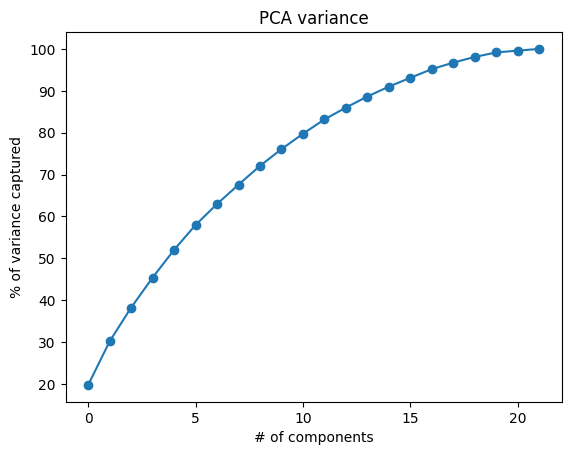

In [66]:
def cumulative_sum(l: [int]) -> [int]:
    s = 0
    cumulative_l = []
    for e in l:
        s += e
        cumulative_l.append(s)
    return cumulative_l

plt.plot(100 * np.array(cumulative_sum(pca.explained_variance_ratio_)), marker='o')
plt.xlabel('# of components')
plt.ylabel('% of variance captured')
plt.title('PCA variance')
plt.show()

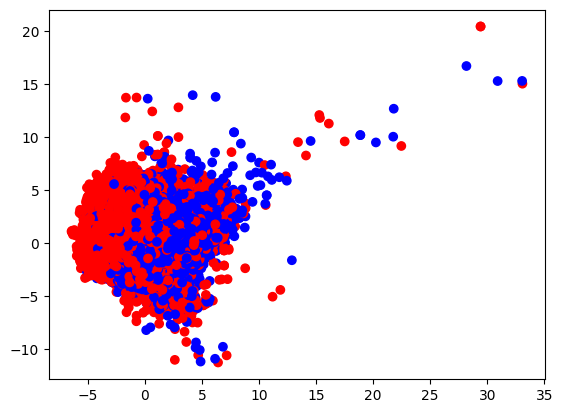

In [72]:
colors = np.array(["red", "blue"])
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color=colors[train_data["smoking"].to_numpy()])